<a href="https://colab.research.google.com/github/Sahana-Sivaraj/2015/blob/master/Solution_20200074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Bank Marketing Dataset 

The dataset is related with direct marketing campaigns (phone calls) of a 
Portuguese banking institution. 
The goal is to predict if the client will subscribe a 
term deposit.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import matplotlib

Missing Values and Outlier Detection handling

In [ ]:
import pandas as pd
df=pd.read_csv("../banking/banking.csv");
df.head(2);

##### Handling Null Values

In [ ]:
print(df.shape)
df.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   411

Based on the data information we didn't have any missing or null values

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


Based on the data information we didn't have any missing or null values 

In [ ]:
df.dropna(axis=0)
print(df.shape)

(41188, 21)


Drop Duplicates if it is in there

In [ ]:
df.drop_duplicates()
print(df.shape)

(41188, 21)


In [ ]:
new_data = df.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + 'missing'] = new_data[col].isnull()
# new_data.head(10)
features = new_data.columns
features

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

##### Check Outliers and Handle 

Shape Before Removing Outliers: (41188, 21)
32.0 47.0
15.0
9.5 69.5
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
102.0 319.0
217.0
-223.5 644.5
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
1.0 3.0
2.0
-2.0 6.0
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
999.0 999.0
0.0
999.0 999.0
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
0.0 0.0
0.0
0.0 0.0
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
-1.8 1.4
3.2
-6.6000000000000005 6.200000000000001
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
93.075 93.994
0.9189999999999969
91.69650000000001 95.3725
Shape After Removing Outliers: (41188, 21)
Shape Before Removing Outliers: (41188, 21)
-42.7 -36.4
6.300000000000004
-52.150000000000006 -26.949999999999992
Shape After Removing Outliers: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


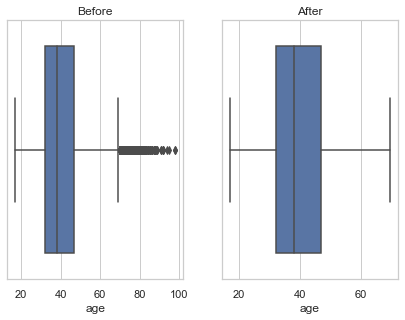

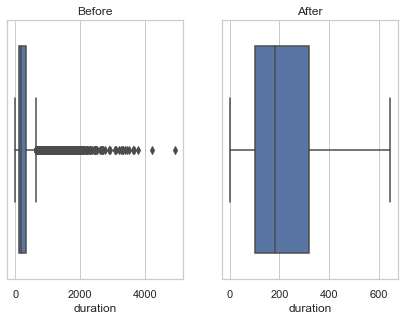

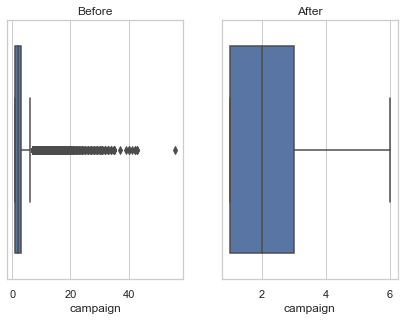

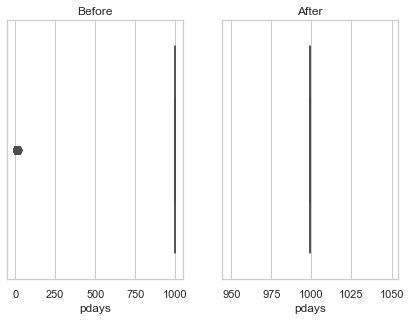

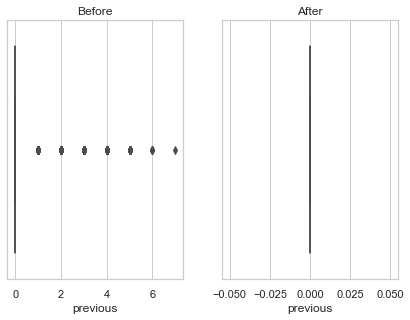

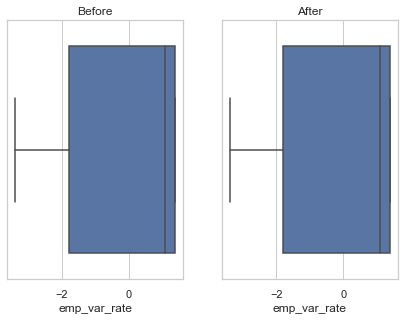

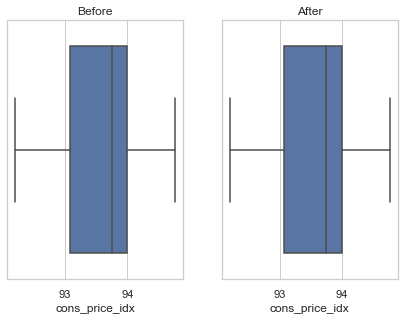

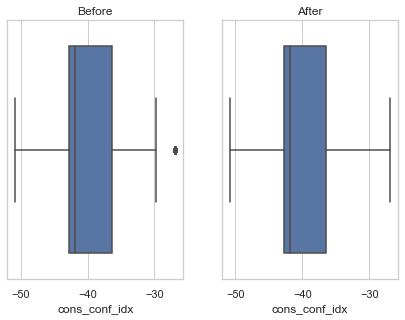

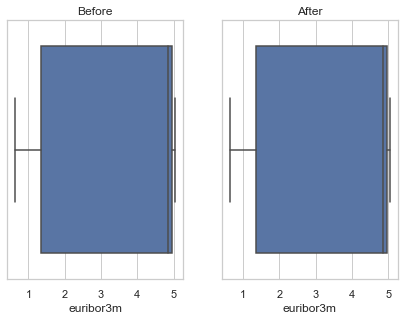

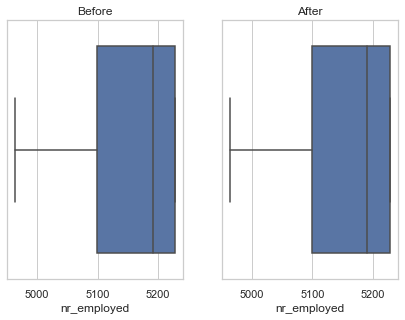

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings("ignore") 
plt.rc("font", size=14)
########### HANDLING OUTLIER ######
def detect_outliers(df,col):
    fig, axes = plt.subplots(1,2)
    plt.tight_layout(0.2)
    sns.boxplot(df[col],orient='v',ax=axes[0])
    print("Shape Before Removing Outliers:", df.shape)
    axes[0].title.set_text("Before")
    df2 = df.copy()
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    print(Q1,Q3)
    IQR = Q3-Q1
    print(IQR)
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit,upper_limit)
    df2[col] = np.where(df2[col]>upper_limit,upper_limit,df2[col])
    df2[col] = np.where(df2[col]<lower_limit,lower_limit,df2[col])
    print("Shape After Removing Outliers:", df2.shape)
    sns.boxplot(df2[col],orient='v',ax=axes[1])
    axes[1].title.set_text("After")
    return df2
numeric_fields=['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
for i in numeric_fields:
    df=detect_outliers(df,i)
    
df.head(2)

Mainly the outliers will be detect and remove for numerical fields on in this case we seperated all numerical fields, get the values of numerical fields and handled outlier detection, removed outliers values by using IQR method in the above the box plot showed the how outliers are handled and removed on each numerical values

##### Q-Q Plots

Used Q-Q plots and Histograms to identify right and left skewd numerical features and tranform them into normally distributed values 

age Q-Q plot


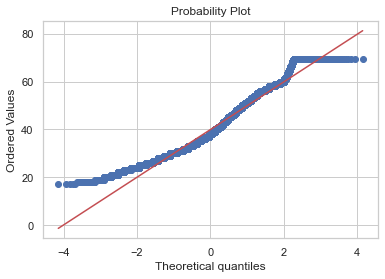

duration Q-Q plot


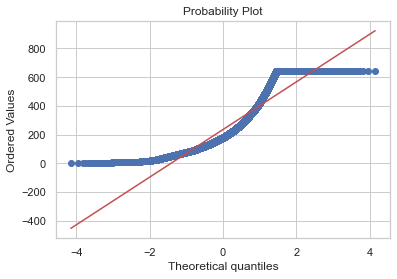

campaign Q-Q plot


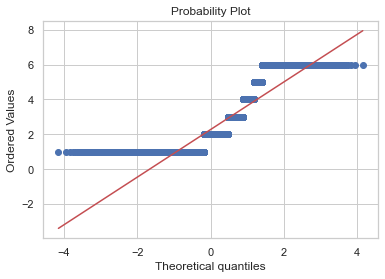

pdays Q-Q plot


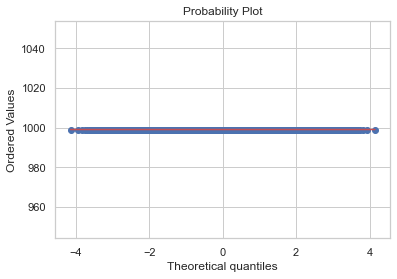

previous Q-Q plot


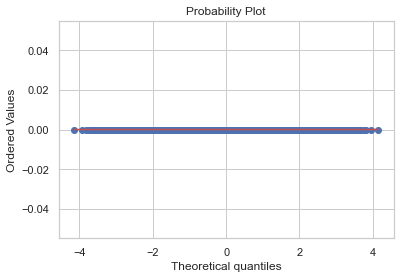

emp_var_rate Q-Q plot


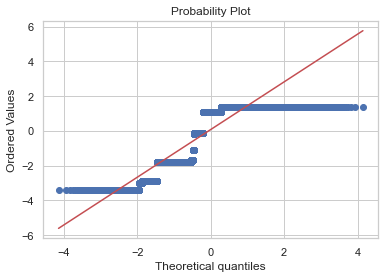

cons_price_idx Q-Q plot


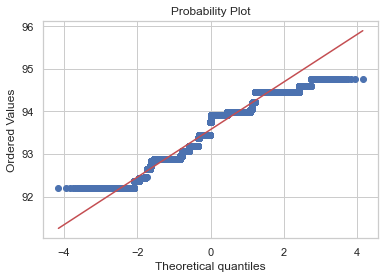

cons_conf_idx Q-Q plot


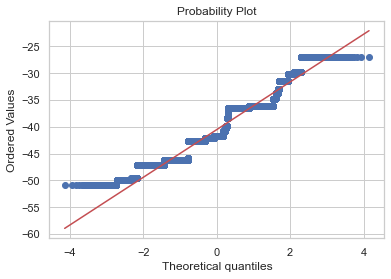

euribor3m Q-Q plot


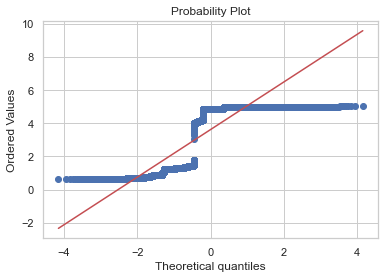

nr_employed Q-Q plot


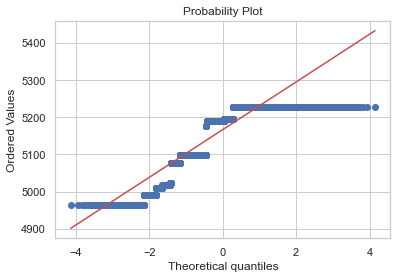

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats   
numerical_attributes=df[numeric_fields] 
for i in numeric_fields:
    print(i,"Q-Q plot")
    stats.probplot(numerical_attributes[i], dist="norm", plot=plt)
    plt.show() 

##### Histograms of features

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>],
       [<AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

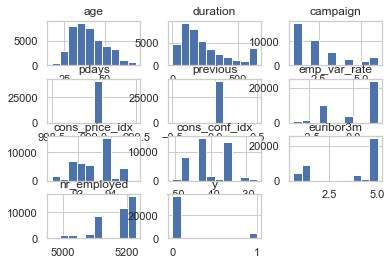

In [ ]:
df.hist()

Based on the features histogrames right skewed features are 'age','duration','campaign' and left skewd features are 'euribor3m','nr_employed','emp_var_rate','cons_price_idx'

##### Right Skewed Features Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
data = df.copy() #replace 0 s with nan because ln
data = data.dropna() #drop all nan
print(data.columns)

columnsRightSkewed = ['age','duration','campaign']

logarithm_transformer = FunctionTransformer(np.log, validate=True)
data_new = logarithm_transformer.transform(data[columnsRightSkewed])
df_right = pd.DataFrame(data_new, columns=columnsRightSkewed)
df_right



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


,age,duration,campaign
0,3.784190,5.347108,0.000000
1,3.970292,4.927254,0.000000
2,3.332205,5.826000,1.098612
3,3.663562,5.220356,0.693147
4,4.007333,4.919981,0.000000
...,...,...,...
41183,4.077537,5.402677,0.000000
41184,3.433987,5.278115,0.693147
41185,3.737670,4.127134,1.098612
41186,3.871201,5.298317,0.693147


Logarithmic transformation – only for positive numbers, when distribution is right skewed, ln(x)
transformer = FunctionTransformer(np.log, validate=True)

##### Left Skewed Features Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

data = df.copy() #replace 0 s with nan because ln
data = data.dropna() #drop all nan
print(data.columns)

columnsLeftSkewed = ['euribor3m','nr_employed','emp_var_rate','cons_price_idx']
logarithm_transformerleft= FunctionTransformer(lambda x: x ** 3, validate=True)
data_new_l = logarithm_transformerleft.transform(data[columnsLeftSkewed])
df_left = pd.DataFrame(data_new_l, columns=columnsLeftSkewed)
df_left

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


,euribor3m,nr_employed,emp_var_rate,cons_price_idx
0,122.245484,1.428998e+11,2.744,815932.556472
1,65.013301,1.402676e+11,-0.001,809557.568000
2,0.387420,1.243711e+11,-4.913,832042.793216
3,2.773505,1.325808e+11,-5.832,806304.594797
4,0.656235,1.308025e+11,-24.389,783802.950797
...,...,...,...,...
41183,115.216934,1.428998e+11,2.744,842971.295995
41184,114.791256,1.398792e+11,1.331,830424.962152
41185,114.578811,1.398792e+11,1.331,830424.962152
41186,0.408518,1.263171e+11,-39.304,789683.302099


 Exponential or power transformation :used to reduce the left skewness
transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

##### Numerical features concatination after transformers

In [ ]:
df_numerical=pd.concat([df_left,df_right,df['pdays'],df['previous'],df['cons_conf_idx']], axis = 1)
# df_numerical
df_numerical.drop('duration', axis=1)
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   euribor3m       41188 non-null  float64
 1   nr_employed     41188 non-null  float64
 2   emp_var_rate    41188 non-null  float64
 3   cons_price_idx  41188 non-null  float64
 4   age             41188 non-null  float64
 5   duration        41188 non-null  float64
 6   campaign        41188 non-null  float64
 7   pdays           41188 non-null  float64
 8   previous        41188 non-null  float64
 9   cons_conf_idx   41188 non-null  float64
dtypes: float64(10)
memory usage: 3.1 MB


##### Categorical Features Encoding using one hot encoding technique

In [ ]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()
# Work-class Count plot
# plt.figure(figsize=(12,6))

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


One hot coding technique was used as a feature coding technique for categorical feature validation since it is suitable for  for linear models and keeps all the information of the categorical variable.

In [ ]:
df_new = pd.concat([df_numerical,cols_new_cat], axis = 1)
df_new['output']= df['y']
df_new.info()
df_new.to_csv('features.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   euribor3m                      41188 non-null  float64
 1   nr_employed                    41188 non-null  float64
 2   emp_var_rate                   41188 non-null  float64
 3   cons_price_idx                 41188 non-null  float64
 4   age                            41188 non-null  float64
 5   duration                       41188 non-null  float64
 6   campaign                       41188 non-null  float64
 7   pdays                          41188 non-null  float64
 8   previous                       41188 non-null  float64
 9   cons_conf_idx                  41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

##### Scale and/or standardized the features and histogrames

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'job_admin.'}>,
        <AxesSubplot:title={'center':'job_blue-collar'}>,
        <AxesSubplot:title={'center':'job_entrepreneur'}>,
        <AxesSubplot:title={'center':'job_housemaid'}>,
        <AxesSubplot:title={'center':'job_management'}>,
        <AxesSubplot:title={'center':'job_retired'}>],
       [<AxesSubplot:title={'center':'job_self-employed'}>,
        <AxesSubplot:title={'center':'job_services'}>,
        <AxesSubplot:ti

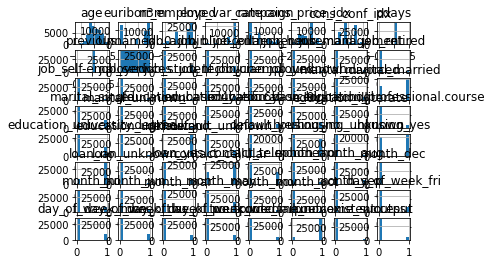

In [ ]:
import pandas as pd
import sklearn
# duration column got removed since it has huge impact on model validation
scaler= sklearn.preprocessing.StandardScaler()
numerical_scaled_columns=['age','euribor3m','nr_employed','emp_var_rate','campaign','cons_price_idx','cons_conf_idx','pdays','previous']
df_final=pd.read_csv('features.csv')
df_final
data = pd.DataFrame(df_final, columns=numerical_scaled_columns)
scaler.fit(data)
train_scaled = scaler.transform(data)
train = pd.DataFrame(train_scaled, columns=numerical_scaled_columns)
df_final = df_final.drop(numerical_scaled_columns, axis=1)
df_final=df_final.drop(['duration'], axis=1)
df_scaled=pd.concat([train,df_final], axis = 1)
df_scaled.to_csv('scaled.csv')
df_scaled.hist()

All the numerical features are sclaed due to avoid the wastage of time to find support vectors for SVMs and normalize the range of values of independent variables most of the numerical variables.

##### Feature discretization

d:\data_mining\labs\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 7 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
d:\data_mining\labs\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 8 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'Unnamed: 0.1'}>,
        <AxesSubplot:title={'center':'job_admin.'}>,
        <AxesSubplot:title={'center':'job_blue-collar'}>,
        <AxesSubplot:title={'center':'job_entrepreneur'}>,
        <AxesSubplot:title={'center':'job_housemaid'}>,
        <AxesSubplot:title={'center':'job_management'}>,
        <AxesSubplot:title={'center':'job_retired'}>],
       [<AxesSubplot:title={'center':'job_self-employed'}>,
        <AxesSubplot:title={'center':'job_services'}>,
        <AxesSubplot:

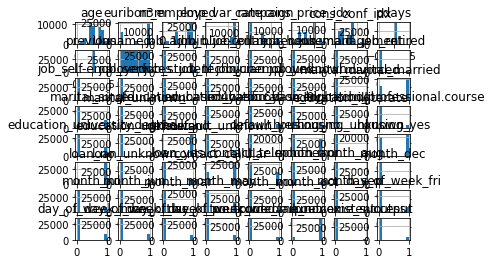

In [ ]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
numerical_scaled_columns=['age','euribor3m','nr_employed','emp_var_rate','campaign','cons_price_idx','cons_conf_idx','pdays','previous']
df_scaled=pd.read_csv("scaled.csv");
df_scaled.columns
df_scaled=df_scaled.drop(['Unnamed: 0'], axis=1)
df_scaled.columns
df_scaled.dropna()
data=df_scaled[numerical_scaled_columns]
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
df_discretize = pd.DataFrame(_discretize,columns=numerical_scaled_columns)
df_scaled = df_scaled.drop(numerical_scaled_columns, axis=1)
df_dis=pd.concat([df_discretize,df_scaled], axis = 1)
df_dis.to_csv('dis.csv',header=True)
df_dis.hist()

Used KBinsDiscretizer for Feature discretization 

######  Correlation Matrix between all features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
df_dis=pd.read_csv('dis.csv')
df_dis.columns
# del df_dis['Unnamed: 0']
features=['age', 'euribor3m', 'nr_employed', 'emp_var_rate',
       'campaign', 'cons_price_idx', 'cons_conf_idx', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

y= df_dis[['output']]
x = df_dis[features]
x.to_csv('x.csv')
y.to_csv('y.csv')

Divided into two sets containing features and target variable seperatly

##### SVD (Singular Value Decomposition) for feature reduction & Correlation Matrix for Identifying Indepedent and signification features

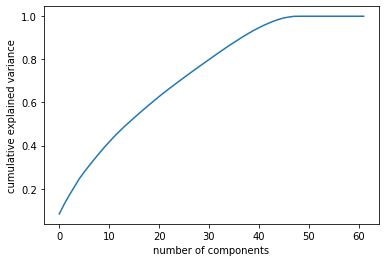

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt 

x=pd.read_csv('x.csv')
X_stand = StandardScaler().fit_transform(x)
X_sparse = csr_matrix(X_stand)
svd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
svd.fit_transform(X_stand)
tsvd_var_ratios = svd.explained_variance_ratio_
plt.plot(np.cumsum(tsvd_var_ratios))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


Based on the above graph for selecting no of components for reduction the 75% percentage of explained variance in 30 components even though we are loosing the importance with this variance.Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that needed about 40 or more components to retain 90%-95% of the variance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt 

def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

print(select_n_components(tsvd_var_ratios, 0.95))

42


In this case we need at least 42 components for SVD reduction for 95% variance 

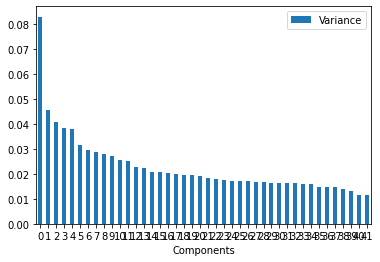

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.decomposition import TruncatedSVD

svd1 = TruncatedSVD(n_components=select_n_components(tsvd_var_ratios, 0.95))
X_transformed = svd1.fit_transform(X_stand)
components= list(range(42))
pd.DataFrame({'Components':components,'Variance':svd1.explained_variance_ratio_}).plot.bar(x='Components',y='Variance',rot=0);
principalDf = pd.DataFrame(data = X_transformed)
finalDf = pd.concat([principalDf, df_dis[['output']]], axis = 1)
finalDf.to_csv('train.csv')

This graph will explain how the selected 42 components changed with explained_variance_ratio_ scores

#### (c) Apply the following techniques to predict the value of Y for the test dataset (Training Dataset to Test Dataset is 0.8 to 0.2 ratio) 


##### Logistic Regression (LR) 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('train.csv')
data_x = data.drop('output',1)
print("Shape of X:", data_x.shape)
data_y = data["output"]
print("Shape of Y:", data_y.shape)
X_train, X_test, y_train, y_test  = train_test_split(data_x, data_y, test_size=0.2,train_size=0.8,random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
import pickle
Pkl_Filename = "Pickle_LR_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)
# Load the Model back from file
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)

Shape of X: (41188, 43)
Shape of Y: (41188,)
Shape of X_train: (32950, 43)
Shape of X_test: (8238, 43)
Shape of y_train: (32950,)
Shape of y_test: (8238,)
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7295
           1       0.64      0.25      0.36       943

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



Based on the trained logistic regression model F1-score is really high 0.90 and precision  0.77 and recall 0.61 

##### The ROC Curve of logistic regression and evaluation metrices

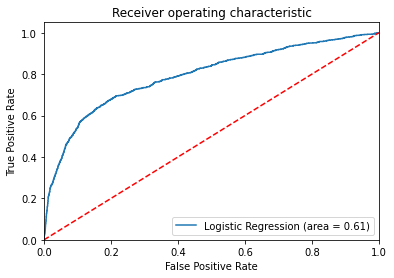

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Based on logistic regression roc curve since it is well distributed with recall of 0.61 can be a good performance

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
lscore = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy Score: ",lscore)
error_lscore= mean_squared_error(y_test, y_pred)
print("Logistic Regression Model mean squared error: ",error_lscore)
rmse=mean_squared_error(y_test, y_pred,squared=False)
print("Logistic Regression Model root mean squared error: ",rmse)

Logistic Regression Model Accuracy Score:  0.8979121145909201
Logistic Regression Model mean squared error:  0.10208788540907987
Logistic Regression Model root mean squared error:  0.31951194877356287


Obtained Logistic Regression model accuracy arround 89 % since it is comperatively

##### SVM with linear model

In [ ]:
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
from sklearn.metrics import accuracy_score
lineraSVM = svm.SVC(kernel='linear', C=1)
lineraSVM.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(lineraSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
y_pred_svm = sig_clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))
import pickle
Pkl_Filename = "Pickle_SVM_L_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(sig_clf, file)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7295
           1       0.17      0.00      0.00       943

    accuracy                           0.89      8238
   macro avg       0.53      0.50      0.47      8238
weighted avg       0.80      0.89      0.83      8238



The classification summary report of actual and predictions SVM

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy Score: ",score)
from sklearn.metrics import mean_squared_error
error_score= mean_squared_error(y_test, y_pred_svm)
print("SVM Model mean squared error: ",error_score)

SVM Model Accuracy Score:  0.8850449138140325
SVM Model mean squared error:  0.11495508618596746


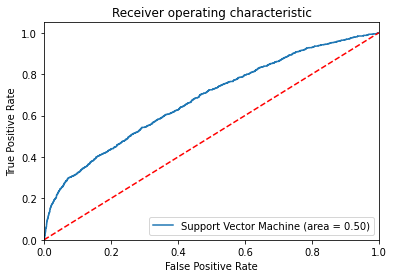

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt 
import pickle
Pkl_Filename = "Pickle_SVM_L_Model.pkl" 
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    sig_clf_lineraSVC = pickle.load(file)
logit_roc_auc = roc_auc_score(y_test, sig_clf_lineraSVC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, sig_clf_lineraSVC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Based on the roc curve the 0.5 which is comparatively acceptable performance model an reasonable distributed

##### SVM with kernal modal

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
lineraSVC = svm.SVC(kernel='rbf', C=1, gamma=1)
lineraSVC.fit(X_train, y_train)
sig_clf_lineraSVC = CalibratedClassifierCV(lineraSVC)
sig_clf_lineraSVC.fit(X_train, y_train)
y_pred_liner_svm = sig_clf_lineraSVC.predict(X_test)
y_pred_l_svm = lineraSVC.predict(X_test)
print(classification_report(y_test, y_pred_l_svm))
# import pickle
# Pkl_Filename = "Pickle_SVM_R_Model.pkl"  
# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(sig_clf_lineraSVC, file)
Pkl_Filename = "Pickle_SVMR1_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lineraSVC, file)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7295
           1       0.00      0.00      0.00       943

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.89      0.83      8238



d:\data_mining\labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\data_mining\labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\data_mining\labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
score = accuracy_score(y_test, y_pred_liner_svm)
print("SVM Model Accuracy Score: ",accuracy_score(y_test, y_pred_liner_svm))
print("SVM Model mean squared error: ",mean_squared_error(y_test, y_pred_liner_svm))

SVM Model Accuracy Score:  0.8855304685603301
SVM Model mean squared error:  0.11446953143966983


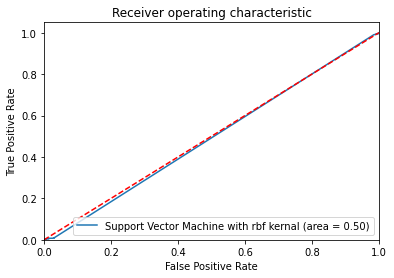

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pickle
Pkl_Filename = "Pickle_SVM_R_Model.pkl" 
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    sig_clf_lineraSVC = pickle.load(file)
logit_roc_auc = roc_auc_score(y_test, sig_clf_lineraSVC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, sig_clf_lineraSVC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine with rbf kernal (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Based on the evaluation metrices and roc curve the Linear SVM model got 0.8959698956057296 SVM model with rfb  0.8855304685603301 and Logistic Regression model had 0.8979121145909201 based on the accuracy score based on the accuracy score model is Logistic Regression model is suitable for prediction. since it is having nearly 61% performance comaring with SVM models

### (e) Discuss how statistically significant your findings are. 


In [ ]:
import pickle
Pk_Filename = "Pickle_LR_Model.pkl"  
with open(Pk_Filename, 'rb') as file:  
    lr = pickle.load(file)
lr_scores = cross_val_score(lr, X_test,y_test, cv=5);
# print(lr_accuracy)
print(lr_scores.mean())

0.8953629281836349


d:\data_mining\labs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pickle
Pkl_Filename = "Pickle_SVMR_Model.pkl"
from sklearn.model_selection import cross_val_score, cross_val_predict
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    sig_clf_rbfSVC = pickle.load(file)
lrs_scores = cross_val_score(sig_clf_rbfSVC, X_test,y_test, cv=5);
# print(lr_accuracy)
print(lrs_scores.mean())
# print(lrs_accuracy)

0.8855305468607234


In [ ]:
from scipy.stats import ttest_ind, ttest_1samp
ttest,pval = ttest_ind(0.8953629281836349,0.8855305468607234)
if pval <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


Based on statistical hypothesis using K fold cross validation and Two sampled T-test that both svm with rbf kernal and logistic regression can be used to predict the client subscribe the yerm deposit use case